# Visualization - style, seaborn

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Customizing Matplotlib

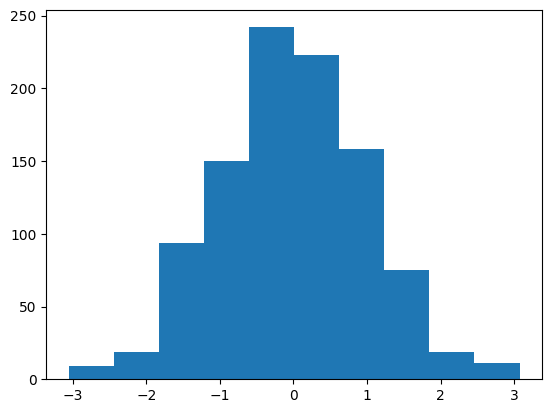

In [ ]:
x = np.random.randn(1000)
plt.hist(x)
plt.show()

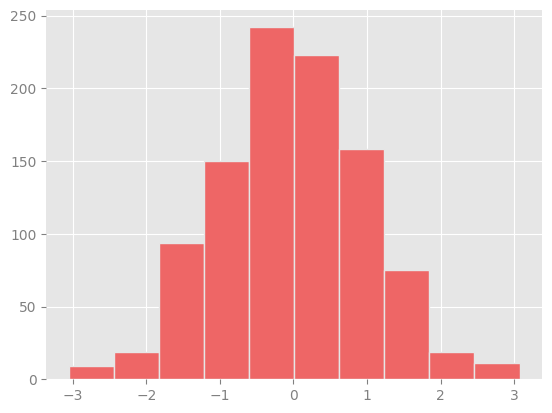

In [ ]:
# 회색 배경 사용
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# 흰색 실선 그리드 그리기
plt.grid(color='w', linestyle='solid')

# 축 스파인 숨기기
for spine in ax.spines.values():
    spine.set_visible(False)

# 상단과 오른쪽 눈금 숨기기
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# 눈금과 레이블을 회색으로 설정
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# 히스토그램 그리기, 점의 색과 테두리 색 설정
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')
plt.show()

# 새 섹션

### rcParams 사용하기
- rcParams는 그래프의 전반적인 스타일과 설정을 전역적으로 제어하는 데 사용되는 설정 dictionary
- rcParams를 사용하면 글꼴 크기, 그래프 크기, 색상 팔레트, 축 레이블 설정 등 matplotlib에서 그리는 그래프의 기본 속성을 사용자 정의 가능


[Document](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams)

In [ ]:
IPython_default = plt.rcParams.copy()

In [ ]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [ ]:
plt.hist(x)
plt.show()

In [ ]:
for i in range(4):
    plt.plot(np.random.rand(10))
plt.show()

In [ ]:
plt.rcParams.update(IPython_default)
plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.linestyle'] = '--'
plt.hist(x)
plt.show()

### Stylesheets
- matplotlib.style 모듈은 미리 만들어놓은 Matplotlib 그래프 스타일을 포함하고 있음

- matplotlib.style.use()를 사용해서 다양한 스타일을 지정할 수 있음

[Document](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [ ]:
plt.rcParams.update(IPython_default)
plt.style.use('bmh')
plt.plot(np.random.rand(10))
plt.show()

In [ ]:
styles = ['default', 'classic', 'Solarize_Light2',
          'bmh', 'dark_background', 'ggplot',
          'grayscale', 'fast', 'seaborn-v0_8']

for i in range(1, 10):
    with plt.style.context(styles[i-1]):
        plt.subplot(3, 3, i)
        for j in range(3):
          plt.plot(np.random.rand(10))
        plt.title(styles[i-1], fontsize=10)

plt.tight_layout()
plt.show()

---

## Seaborn
- Seaborn은 Python을 위한 데이터 시각화 라이브러리
- Matplotlib 위에 구축
- Seaborn은 통계 그래픽을 만들기 위해 보다 높은 수준의 인터페이스를 제공하며, 복잡한 시각화를 보다 쉽고 아름답게 만들 수 있도록 도와줌

In [ ]:
plt.rcParams.update(IPython_default)
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [ ]:
import seaborn as sns
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Histograms, KDE, and densities
- Histograms
  - 히스토그램은 데이터의 분포를 나타내는 막대 그래프로, 데이터를 여러 구간(빈, bin)으로 나누고 각 구간에 속하는 데이터의 개수(또는 비율)를 막대의 높이로 표시
  - 히스토그램은 데이터의 분포 형태, 중앙값, 범위 등을 파악하는 데 유용

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
  plt.hist(data[col], alpha=0.5)

plt.show()

- KDE (Kernel Density Estimation)
  - KDE는 확률 밀도 함수를 추정하는 데 사용되는 방법
  - 각 데이터 포인트 주변에 커널(kernel)이라는 가중 함수를 적용하고, 이를 모두 합하여 연속적인 밀도 추정치를 생성
  - KDE는 데이터의 분포를 부드러운 곡선으로 표현하며, 히스토그램보다 데이터 분포의 형태를 더 세련되게 표현 가능

In [ ]:
for col in 'xy':
  sns.kdeplot(data[col], fill=True)

plt.show()

In [ ]:
sns.histplot(data['x'], kde=True)
sns.histplot(data['y'], kde=True)

plt.show()

- Jointplot
  - 두 변수 간의 관계를 동시에 시각화하는 함수
  - 주로 산점도(scatter plot) 또는 육각형 빈(hexbin plot)으로 중앙에 두 변수 간의 관계를 보여주며, 각 축의 상단과 오른쪽에는 각 변수의 분포를 히스토그램이나 KDE(Kernel Density Estimate) 플롯으로 나타냄

In [ ]:
with sns.axes_style('white'):
  sns.jointplot(x="x", y="y", data=data, kind='kde')

plt.show()

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

### Pair plots
- joint plots을 더 큰 차원의 데이터 집합으로 일반화 한 것
- 모든 값 쌍을 서로 비교하여 플롯하고자 할 때 다차원 데이터 간의 상관관계를 탐색하는 데 매우 유용
- 변수들 사이의 상관관계, 분포, 추세 등을 빠르게 확인 가능
- 각 변수에 대한 히스토그램 또는 밀도 그래프와 같은 일변량 분포를 대각선에, 그리고 산점도나 회귀선과 같은 이변량 분포를 나머지 격자(grid)에 표시

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms
- 데이터의 서브셋에 대한 히스토그램을 여러 개의 패널(면)로 나누어 보여주는 시각화 방법
- 특정 범주형 변수의 각 범주에 대해 분리된 히스토그램을 그려서, 범주 간의 분포 차이를 명확하게 비교할 수 있음
- FacetGrid 또는 catplot 함수를 사용하여 면 분할 히스토그램을 쉽게 생성

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

plt.show()

### Joint distributions
- 두 변수 간의 관계를 시각화하는 데 사용되는 통계적 개념
- 두 변수가 어떻게 함께 변화하는지, 즉 한 변수의 값이 다른 변수의 값에 어떻게 영향을 미치는지를 확인

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue='sex', data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### catplot
- 범주형 데이터를 시각화하는 데 사용되는 함수
- 다양한 종류의 범주형 그래프를 생성할 수 있으며, 특히 범주형 변수와 하나 이상의 수치형 변수 간의 관계를 보여줌
- kind 매개변수를 사용하여 다양한 유형의 범주형 그래프를 만들 수 있습니다. 예를 들어, kind="strip"은 스트립 플롯(strip plot), kind="box"는 박스 플롯(box plot), kind="bar"는 바 플롯(bar plot) 등을 생성

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

---